In [1]:
from Bio import SeqIO
import pandas as pd

## Se empleó el archivo FASTA descargado de [NCBI Protein](https://www.ncbi.nlm.nih.gov/protein/?term=antimicrobial+peptide+AND+Frog).  
A partir de dicho archivo se extrajeron la descripción y la secuencia de cada péptido, se calculó su tamaño y se construyó un DataFrame de pandas para facilitar su manipulación y análisis posterior.

In [2]:
fasta_dict = {}

for seq_record in SeqIO.parse("data/data_cruda.fasta", "fasta"):
    fasta_dict[seq_record.description] = str(seq_record.seq)

df_csv_bio = pd.DataFrame.from_dict(fasta_dict, orient='index', columns=['sequence']).reset_index()
df_csv_bio.columns = ['header', 'sequence']
df_csv_bio['size_sequence'] = df_csv_bio['sequence'].apply(lambda x: len(x))

In [3]:
df_csv_bio

,header,sequence,size_sequence
0,gi|2550499859|gb|WKS83237.1| ABC transporter p...,MFFYILRRITLLVITLLVLTLGAYLLEFRLITQVLDFWHGYPDFLQ...,319
1,gi|2550499860|gb|WKS83238.1| ABC transporter p...,MHDKSNIYPELKILSPLEQTWASYRRNPLAMAGLWCFGLLLLVTLI...,297
2,gi|2550499861|gb|WKS83239.1| ATP-binding casse...,MPLLDIRNLTIEIDTPQGKVKAVDRVSLTLNEGEIRGLVGESGSGK...,332
3,gi|2550499862|gb|WKS83240.1| ABC transporter A...,MTEPSLLQVRGLCKTYQNRTGLFRRRAVEAIKPLSFDLEVGQTLAI...,261
4,gi|2788198176|gb|XEI34107.1| ABC transporter p...,MRRPDVIRFAAVALLRQRSRALVLILAVSLSVTSVLLLTALGEGAR...,404
...,...,...,...
3856,gi|512849429|ref|XP_004915567.1| cathelicidin ...,MGATRMILVLASLAMAHIIWAFYLEDNRSVPLSSAFSRAIGLYNTQ...,171
3857,gi|1774921958|gb|KAE8614566.1| hypothetical pr...,MVMQPGKWTLILVLFCLFTHQLEGACLINPSVRAAVRLPRMTPFWR...,80
3858,gi|1785408890|ref|XP_031747845.1| liver-expres...,MGSIEAACLCILLLLCGSEVQSQPPSPDPGFKDEIKKMEWPVFLPP...,90
3859,gi|325305999|gb|ADZ11200.1| rhacophorin-1 anti...,MFTLKKSLLLLFFLGTINLSLCEEERNAEEEKRDGGDETDVEVQKR...,70


### La identificación de la familia peptídica, la especie y el tipo se realizó a partir de la información contenida en los encabezados, complementada mediante el uso de un modelo de lenguaje.  
Para ello, se empleó el siguiente prompt: *"Necesito obtener la familia de péptido y la especie de cada descripción de la fila. Si no está disponible, agregar `None` en la columna"*.  

In [4]:
df_csv_bio['header'].to_csv('data/descripciones_sucias.txt', index=False, header=False)

### Este procedimiento fue necesario debido a la ausencia de un formato estandarizado en las descripciones originales.

En `data/peptide_families_species_dict.csv` quedó los resultados de la estandarización


In [5]:
data_asociada = pd.read_csv('data/peptide_families_species_dict.csv')
data_asociada['header'] = df_csv_bio['header']
data_asociada['Species'] = data_asociada['Species'].apply(lambda x: x.upper().replace('"', '') if isinstance(x, str) else x)
data_asociada['Species Family'] = data_asociada['Species'].apply(lambda x: x.split(' ')[0] if isinstance(x, str) else x)

In [6]:
df_csv_bio = df_csv_bio.merge(data_asociada, left_on='header', right_on='header', how='left')

In [7]:
del(df_csv_bio['header'])

In [8]:
df_csv_bio.head()

,sequence,size_sequence,Peptide_Family,Species,Species Family
0,MFFYILRRITLLVITLLVLTLGAYLLEFRLITQVLDFWHGYPDFLQ...,319,NaN,AEROMONAS CAVIAE,AEROMONAS
1,MHDKSNIYPELKILSPLEQTWASYRRNPLAMAGLWCFGLLLLVTLI...,297,NaN,AEROMONAS CAVIAE,AEROMONAS
2,MPLLDIRNLTIEIDTPQGKVKAVDRVSLTLNEGEIRGLVGESGSGK...,332,NaN,AEROMONAS CAVIAE,AEROMONAS
3,MTEPSLLQVRGLCKTYQNRTGLFRRRAVEAIKPLSFDLEVGQTLAI...,261,NaN,AEROMONAS CAVIAE,AEROMONAS
4,MRRPDVIRFAAVALLRQRSRALVLILAVSLSVTSVLLLTALGEGAR...,404,NaN,AEROMONAS VERONII,AEROMONAS


In [9]:
df_csv_bio.dropna(inplace=True)

In [10]:
df_csv_bio

,sequence,size_sequence,Peptide_Family,Species,Species Family
16,MAFLKKSLLLVLFLGLVSLSICEEEKRENEDEEKQEDDDQSENKRG...,71,Dermaseptin,AGALYCHNIS CALLIDRYAS,AGALYCHNIS
17,MAFLKKSLLLVLFLALVPLSICEEEKREEEDEEKQEDDDQSENKRG...,71,Dermaseptin,AGALYCHNIS CALLIDRYAS,AGALYCHNIS
18,MAFLKKSLLLVLFLGLVSLSICEEEKRENEDEEEQEDDEQSEMRRS...,75,Dermaseptin,AGALYCHNIS CALLIDRYAS,AGALYCHNIS
27,MAFLKKSLLLVLFLGLVSLSICEEEKREEENEEEQEDDEQSEEKRG...,74,Dermaseptin,AGALYCHNIS CALLIDRYAS,AGALYCHNIS
38,AVWKDFLKNIGKAAGKAVLNSVTDMVNE,28,Dermaseptin,INSULINOTROPIC PEPTIDE,INSULINOTROPIC
...,...,...,...,...,...
3751,MFTLKKTLLLLFFLGTINLSLCEEERNAEEERRDGDDEMDVEVKKR...,61,Temporin,SYLVIRANA SPINULOSA,SYLVIRANA
3752,MFTLKKTLLLLFFLGTINLSLCEEERNAEEERRDGDDEMDVEVKKR...,61,Temporin,SYLVIRANA SPINULOSA,SYLVIRANA
3753,MFTLKKTLLLLFFLGTINLSLCEEERNAEEERRDGDDEMDVEVKKR...,61,Temporin,SYLVIRANA SPINULOSA,SYLVIRANA
3777,MRSSPGNMERIVICLMVIFLGTLVHKSSSQGQDRHMIRMRQLIDIV...,182,Temporin,SYNTHETIC CONSTRUCT,SYNTHETIC


<AxesSubplot:title={'center':'Histograma de tamaños de secuencias'}, ylabel='Frequency'>

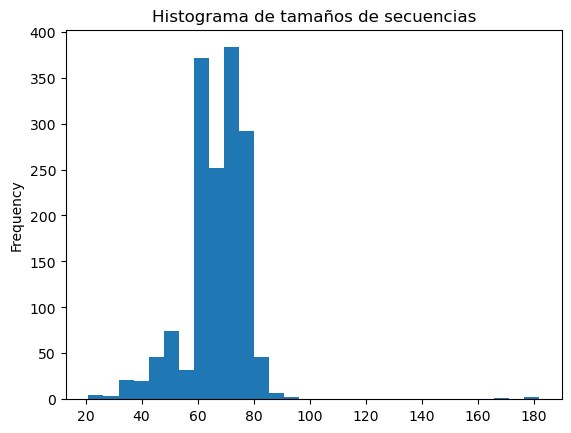

In [11]:
df_csv_bio['size_sequence'].plot(kind='hist', bins=30, title='Histograma de tamaños de secuencias')

### Se seleccionaron las secuencias con longitudes entre 40 y 150 aminoácidos.  
Las secuencias con longitudes superiores a 150 aminoácidos fueron escasas y se trataron como valores atípicos dentro de la muestra.


In [12]:
df_csv_bio = df_csv_bio[df_csv_bio['size_sequence'] >= 40]
df_csv_bio = df_csv_bio[df_csv_bio['size_sequence'] <= 150]

<AxesSubplot:title={'center':'Histograma de tamaños de secuencias'}, ylabel='Frequency'>

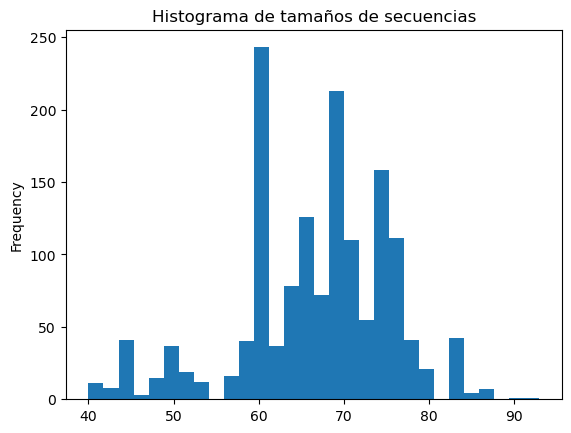

In [13]:
df_csv_bio['size_sequence'].plot(kind='hist', bins=30, title='Histograma de tamaños de secuencias')

### Se eliminaron las secuencias que no iniciaban con el aminoácido metionina (M), ya que este residuo corresponde al codón de inicio de la traducción. 

Su ausencia se interpretó como indicio de registros incompletos o de anotaciones parciales en la base de da


In [14]:
df_csv_bio['filtro'] = df_csv_bio['sequence'].apply(lambda x: 'Eliminar' if x[0]!='M' else 'No Eliminar')

In [15]:
df_csv_bio['filtro'].value_counts()

No Eliminar    1334
Eliminar        188
Name: filtro, dtype: int64

In [16]:
df_csv_bio = df_csv_bio[df_csv_bio['filtro']!='Eliminar']

In [17]:
del df_csv_bio['filtro']

### Se consideraron únicamente los primeros 20 aminoácidos de cada secuencia, dado que, según la bibliografía, el péptido señal se localiza típicamente en este segmento inicial.


In [18]:
df_csv_bio['sequence_20'] = df_csv_bio['sequence'].apply(lambda x: x[:20])

In [19]:
df_csv_bio

,sequence,size_sequence,Peptide_Family,Species,Species Family,sequence_20
16,MAFLKKSLLLVLFLGLVSLSICEEEKRENEDEEKQEDDDQSENKRG...,71,Dermaseptin,AGALYCHNIS CALLIDRYAS,AGALYCHNIS,MAFLKKSLLLVLFLGLVSLS
17,MAFLKKSLLLVLFLALVPLSICEEEKREEEDEEKQEDDDQSENKRG...,71,Dermaseptin,AGALYCHNIS CALLIDRYAS,AGALYCHNIS,MAFLKKSLLLVLFLALVPLS
18,MAFLKKSLLLVLFLGLVSLSICEEEKRENEDEEEQEDDEQSEMRRS...,75,Dermaseptin,AGALYCHNIS CALLIDRYAS,AGALYCHNIS,MAFLKKSLLLVLFLGLVSLS
27,MAFLKKSLLLVLFLGLVSLSICEEEKREEENEEEQEDDEQSEEKRG...,74,Dermaseptin,AGALYCHNIS CALLIDRYAS,AGALYCHNIS,MAFLKKSLLLVLFLGLVSLS
53,MFTSKKPLLLLFFLGTISLSLCEQERDADEEEENGGEAKVEEIKRF...,59,Amolopin,AMOLOPS CHUNGANENSIS,AMOLOPS,MFTSKKPLLLLFFLGTISLS
...,...,...,...,...,...,...
3748,MFTLKKSLLLIFFLGTISLSLCEKERDADDDEVEVIKQEEKRGFLN...,70,Ranatuerin,SYLVIRANA SPINULOSA,SYLVIRANA,MFTLKKSLLLIFFLGTISLS
3750,MFTTKKSLLLLFFLGTINLSLCQEERNAEEERRDGDDEGGVEVQKR...,65,Temporin,SYLVIRANA SPINULOSA,SYLVIRANA,MFTTKKSLLLLFFLGTINLS
3751,MFTLKKTLLLLFFLGTINLSLCEEERNAEEERRDGDDEMDVEVKKR...,61,Temporin,SYLVIRANA SPINULOSA,SYLVIRANA,MFTLKKTLLLLFFLGTINLS
3752,MFTLKKTLLLLFFLGTINLSLCEEERNAEEERRDGDDEMDVEVKKR...,61,Temporin,SYLVIRANA SPINULOSA,SYLVIRANA,MFTLKKTLLLLFFLGTINLS


In [20]:
df_csv_bio.to_csv('data/sequences_bio_clean.csv', index=False, sep=',', encoding='utf-8')

In [21]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

### Se preparó un archivo FASTA conteniendo únicamente los péptidos señal (correspondientes a los primeros 20 aminoácidos) con el fin de realizar los alineamientos.

In [22]:
sequences = df_csv_bio['sequence_20']
seq_records = [SeqRecord(Seq(seq), id=f"seq{i+1}", description="") for i, seq in enumerate(sequences)]

with open("data/sequence_20.fasta", "w") as fasta_file:
    SeqIO.write(seq_records, fasta_file, "fasta")

### El alineamiento se realizó con Clustal Omega (ClustalO) de manera local, empleando el siguiente comando:

`clustalo -i data/sequence_20.fasta -o data/sequence_20.clustalo.local.aln --fasta`


Se utilizó este procedimiento para obtener las secuencias alineadas de los primeros 20 aminoácidos (péptidos señal).


In [23]:
alignment = []
for seq_record in SeqIO.parse("data/sequence_20.crustalo.local.aln-fasta", "fasta"):
    alignment.append((str(seq_record.seq)))

### Los resultados de los alineamientos se incorporaron al DataFrame de pandas, permitiendo su manipulación y análisis conjunto con la información de secuencias y descripciones.

In [24]:
df_csv_bio['alignment'] = alignment
df_csv_bio.to_csv('data/sequences_bio_clean_alignment_filtro.csv', index=False, sep=',', encoding='utf-8')

In [25]:
df_csv_bio

,sequence,size_sequence,Peptide_Family,Species,Species Family,sequence_20,alignment
16,MAFLKKSLLLVLFLGLVSLSICEEEKRENEDEEKQEDDDQSENKRG...,71,Dermaseptin,AGALYCHNIS CALLIDRYAS,AGALYCHNIS,MAFLKKSLLLVLFLGLVSLS,MAFLKKSLLLVLFLGLVSLS----------
17,MAFLKKSLLLVLFLALVPLSICEEEKREEEDEEKQEDDDQSENKRG...,71,Dermaseptin,AGALYCHNIS CALLIDRYAS,AGALYCHNIS,MAFLKKSLLLVLFLALVPLS,MAFLKKSLLLVLFLALVPLS----------
18,MAFLKKSLLLVLFLGLVSLSICEEEKRENEDEEEQEDDEQSEMRRS...,75,Dermaseptin,AGALYCHNIS CALLIDRYAS,AGALYCHNIS,MAFLKKSLLLVLFLGLVSLS,MAFLKKSLLLVLFLGLVSLS----------
27,MAFLKKSLLLVLFLGLVSLSICEEEKREEENEEEQEDDEQSEEKRG...,74,Dermaseptin,AGALYCHNIS CALLIDRYAS,AGALYCHNIS,MAFLKKSLLLVLFLGLVSLS,MAFLKKSLLLVLFLGLVSLS----------
53,MFTSKKPLLLLFFLGTISLSLCEQERDADEEEENGGEAKVEEIKRF...,59,Amolopin,AMOLOPS CHUNGANENSIS,AMOLOPS,MFTSKKPLLLLFFLGTISLS,MFTSKKPLLLLFFLGTISLS----------
...,...,...,...,...,...,...,...
3748,MFTLKKSLLLIFFLGTISLSLCEKERDADDDEVEVIKQEEKRGFLN...,70,Ranatuerin,SYLVIRANA SPINULOSA,SYLVIRANA,MFTLKKSLLLIFFLGTISLS,MFTLKKSLLLIFFLGTISLS----------
3750,MFTTKKSLLLLFFLGTINLSLCQEERNAEEERRDGDDEGGVEVQKR...,65,Temporin,SYLVIRANA SPINULOSA,SYLVIRANA,MFTTKKSLLLLFFLGTINLS,MFTTKKSLLLLFFLGTINLS----------
3751,MFTLKKTLLLLFFLGTINLSLCEEERNAEEERRDGDDEMDVEVKKR...,61,Temporin,SYLVIRANA SPINULOSA,SYLVIRANA,MFTLKKTLLLLFFLGTINLS,MFTLKKTLLLLFFLGTINLS----------
3752,MFTLKKTLLLLFFLGTINLSLCEEERNAEEERRDGDDEMDVEVKKR...,61,Temporin,SYLVIRANA SPINULOSA,SYLVIRANA,MFTLKKTLLLLFFLGTINLS,MFTLKKTLLLLFFLGTINLS----------
